# Figure 2

In [1]:
import sys
sys.path.append('..')
sys.path.append('../blackbox')

from db import *
from analysis import *
from helpers import *

In [2]:
median_response_time = func.percentile_cont(0.5).within_group(
    ImageCreationRequest.response_time.asc()
).label('median_response_time')

data = (
    session.query(
        median_response_time,
        Prompts.dataset,
        Prompts.prompt,
    ).join(
        Prompts, ImageCreationRequest.prompt_id == Prompts.id
    ).filter(
        or_(
            Prompts.dataset == 'blocklist',
            Prompts.dataset == 'blocklist_mutate',
        )
    ).group_by(
        ImageCreationRequest.prompt_id, Prompts.dataset, Prompts.prompt
    )
)

df = query_to_df(data)
len(df)

50

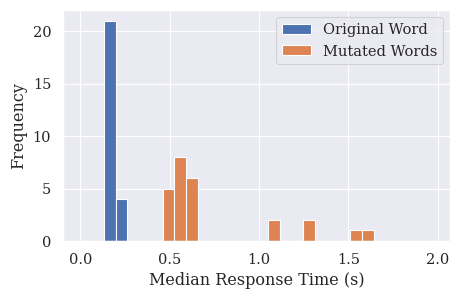

In [3]:
blocklist = df[df['dataset'] == 'blocklist']
blocklist_mutate = df[df['dataset'] == 'blocklist_mutate']

fig, ax = plt.subplots(figsize=(5, 3))

plt_range = (0, df['median_response_time'].max() *1.25)

ax.hist(blocklist['median_response_time'], range=plt_range, color=palette[0], label="Original Word", bins=30)
ax.hist(blocklist_mutate['median_response_time'], range=plt_range, color=palette[1], label="Mutated Words", bins=30)

ax.legend()

ax.set_ylabel('Frequency')
ax.set_xlabel('Median Response Time (s)')

plt.show()